In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d aakash50897/churn-modellingcsv

Dataset URL: https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv
License(s): unknown
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 630MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/churn-modellingcsv.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4874,4875,15764537,Dominguez,703,France,Male,43,8,0.00,2,1,0,9704.66,0
1642,1643,15683544,Buccho,626,Spain,Male,62,3,0.00,1,1,1,65010.74,0
1245,1246,15658052,Cameron,626,France,Female,44,10,81553.93,1,1,0,20063.63,1
7238,7239,15594133,Erskine,697,Spain,Male,62,7,0.00,1,1,0,129188.18,1
3502,3503,15660505,Romani,735,Germany,Male,46,2,106344.95,1,1,0,114371.33,1
6498,6499,15770405,Warlow-Davies,613,France,Female,27,5,125167.74,1,1,0,199104.52,0
2046,2047,15733429,Chou,520,Germany,Male,34,8,120018.86,2,1,1,343.38,0
5725,5726,15693996,Hawks,507,France,Female,33,1,113452.66,1,0,0,142911.99,0
6038,6039,15700964,Pollard,624,Germany,Female,27,7,104848.68,1,1,1,167387.36,0
226,227,15774393,Ch'ien,694,France,Female,30,9,0.00,2,1,1,26960.31,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df=pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=41, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape

((8000, 11), (2000, 11))

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5627,654,29,4,132954.64,1,1,1,146715.07,False,False,True
6594,747,40,3,0.00,1,0,0,57817.84,False,False,False
9004,708,33,3,0.00,2,1,0,138613.21,False,True,True
5153,695,29,9,0.00,2,1,0,111565.45,False,False,False
7616,610,27,4,87262.40,2,1,0,182720.07,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8513,674,27,4,111568.01,1,0,1,22026.18,True,False,False
5200,512,42,9,93955.83,2,1,0,14828.54,True,False,True
4066,823,44,1,0.00,2,0,1,182495.70,False,False,False
931,564,41,9,103522.75,2,1,1,34338.21,True,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[ 0.04340158, -0.9465415 , -0.34836182, ..., -0.57715782,
        -0.57754272,  0.90339252],
       [ 1.00848656,  0.10318316, -0.69357359, ..., -0.57715782,
        -0.57754272, -1.10693854],
       [ 0.6037735 , -0.56482344, -0.69357359, ..., -0.57715782,
         1.73147365,  0.90339252],
       ...,
       [ 1.79715815,  0.48490122, -1.38399712, ..., -0.57715782,
        -0.57754272, -1.10693854],
       [-0.89055162,  0.19861268,  1.37769701, ...,  1.73262835,
        -0.57754272,  0.90339252],
       [-1.23300113,  0.58033074, -1.38399712, ..., -0.57715782,
         1.73147365, -1.10693854]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
y_train

,Exited
5627,0
6594,1
9004,0
5153,0
7616,0
...,...
8513,0
5200,0
4066,0
931,0


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8017 - loss: 0.5176 - val_accuracy: 0.7956 - val_loss: 0.4729
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.4485 - val_accuracy: 0.8025 - val_loss: 0.4458
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8187 - loss: 0.4160 - val_accuracy: 0.8069 - val_loss: 0.4335
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8241 - loss: 0.4152 - val_accuracy: 0.8100 - val_loss: 0.4290
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8170 - loss: 0.4225 - val_accuracy: 0.8106 - val_loss: 0.4220
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.4181 - val_accuracy: 0.8144 - val_loss: 0.4166
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8226 - loss: 0.4182 - val_accuracy: 0.8144 - val_loss: 0.4125
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8255 - loss: 0.4076 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[-0.10480322, -0.32748926, -0.3431473 ,  0.05938921,  0.04198472,
         -0.02541057,  0.03358952, -0.11549826,  0.41305074, -0.01261046,
         -0.12757532],
        [-0.18421552, -0.03835154,  0.38604423, -0.48055187, -0.57973087,
         -0.7039939 ,  0.8070773 , -0.5796387 ,  0.13797127,  0.60548866,
          0.02842348],
        [ 0.08180247, -0.24397913, -0.07906917, -0.10595506, -0.01996509,
          0.07356431, -0.06672758,  0.26776353, -0.10038378,  0.7054844 ,
          0.14987528],
        [ 0.45638418,  0.3295986 ,  0.9988742 , -0.27283114,  0.06615259,
         -0.32314503,  0.05221904,  0.4542573 , -0.21148805,  0.43426266,
         -0.30968046],
        [-0.18967563,  0.12170697,  0.9224393 ,  0.8350077 , -0.04368636,
         -0.32290018,  0.59694743,  0.5162059 , -0.49830526, -0.21551247,
         -1.0114884 ],
        [ 0.49898016, -0.12403524, -0.02844636,  0.16050702, -0.10353231,
          0.4039422 , -0.09497807, -0.5756768 , -0.15528938,  0.2285313

In [ ]:
model.layers[1].get_weights()

[array([[-2.4911423e-01,  3.2933675e-02,  9.4697922e-02, -8.3910298e-01,
         -4.2378539e-01, -8.1270528e-01,  3.6120805e-01, -9.4456419e-02,
          8.1264183e-02,  3.7512845e-01,  2.0043628e-01],
        [-3.1478408e-01, -6.0214353e-01, -4.6308711e-01, -2.9109865e-01,
          9.8184891e-02,  2.9089704e-01,  4.9792707e-01, -4.2653182e-01,
          3.2031962e-01,  1.2414288e-02,  8.1396364e-02],
        [ 3.3000708e-01,  2.1835169e-01, -4.2742237e-01,  4.5623285e-01,
         -7.3055476e-01, -6.1717170e-01, -3.8869154e-01,  3.4773371e-01,
          1.3220006e-01,  4.9745530e-02,  5.4751760e-01],
        [-1.1058353e+00,  2.4593355e-01,  3.8718167e-01,  6.8893814e-01,
          4.0659082e-01, -4.7218242e-01,  3.1202453e-01, -9.2790805e-02,
          1.3446350e-01,  5.2558631e-01, -1.2832226e-01],
        [-5.7176232e-01, -3.7749212e-02,  4.3608952e-01, -8.1804901e-02,
          3.2453609e-01,  2.8024054e-01,  3.2307452e-01,  1.4910056e-01,
          5.8744937e-01,  2.9069388e-0

In [ ]:
model.layers[2].get_weights()

[array([[-0.11219544,  0.48565286,  0.6283827 ,  0.13330223,  0.69526577,
         -0.26964912,  0.26303336, -1.2875336 , -0.83289635, -0.64598215,
         -0.26080814],
        [-0.1770753 , -0.69129753,  0.03067281,  0.487733  ,  0.05648411,
          0.17372261,  0.16429327, -0.9384674 , -0.36075613, -0.81260127,
          0.31037214],
        [-0.43709123,  0.17882891, -0.38377953,  0.291156  ,  0.15535562,
          0.5164611 , -0.09765081,  0.34282005, -0.09318881, -1.1100893 ,
         -0.12634122],
        [ 1.2357126 ,  0.607336  ,  1.3205866 , -0.623145  ,  1.3679638 ,
         -1.6400858 , -1.4061542 , -0.6126331 ,  0.7112097 , -0.41684482,
         -2.063366  ],
        [ 0.01297597,  0.16276674,  0.59143186,  0.5868648 , -0.1442634 ,
         -0.10219137,  0.3178061 ,  0.42673364,  0.0368395 , -0.21047743,
          0.42287603],
        [-2.1901596 , -0.17912759,  0.2022605 ,  0.54398584, -0.07108441,
          0.5808401 , -0.06307009,  0.5809368 ,  0.46799088,  0.7304660

In [ ]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.856

In [ ]:
history.history

{'accuracy': [0.7957812547683716,
  0.7962499856948853,
  0.8076562285423279,
  0.8153125047683716,
  0.8176562786102295,
  0.8212500214576721,
  0.8264062404632568,
  0.8307812213897705,
  0.8354687690734863,
  0.8420312404632568,
  0.8526562452316284,
  0.8551562428474426,
  0.8604687452316284,
  0.8573437333106995,
  0.859375,
  0.8604687452316284,
  0.8604687452316284,
  0.8623437285423279,
  0.8629687428474426,
  0.86328125,
  0.8637499809265137,
  0.8631250262260437,
  0.8631250262260437,
  0.8650000095367432,
  0.8634374737739563,
  0.8639062643051147,
  0.8646875023841858,
  0.8659374713897705,
  0.8643749952316284,
  0.866406261920929,
  0.8653125166893005,
  0.866406261920929,
  0.8667187690734863,
  0.8675000071525574,
  0.8662499785423279,
  0.8668749928474426,
  0.8659374713897705,
  0.8667187690734863,
  0.8670312762260437,
  0.8665624856948853,
  0.8646875023841858,
  0.8671875,
  0.8651562333106995,
  0.8671875,
  0.8665624856948853,
  0.8673437237739563,
  0.8673437237

In [ ]:
import matplotlib.pyplot as plt

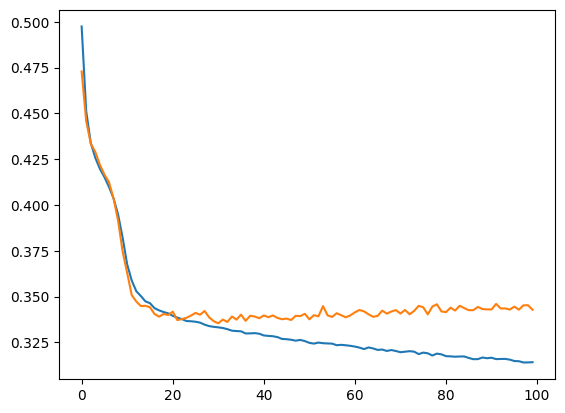

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

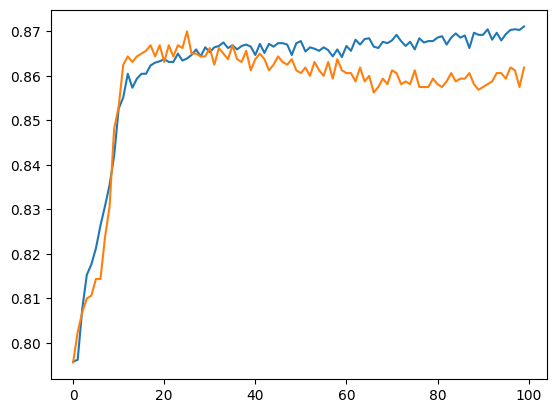

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])